# Biodiversity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data1 = pd.read_csv("species_info.csv")
data1

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [5]:
data2 = pd.read_csv("observations.csv")
data2

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [9]:
data1.shape

(5824, 4)

In [10]:
data2.shape

(23296, 3)

## Data exploration

### Category

In [7]:
data1.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [211]:
data1.groupby("category").size().reset_index()

,category,0
0,Amphibian,80
1,Bird,521
2,Fish,127
3,Mammal,214
4,Nonvascular Plant,333
5,Reptile,79
6,Vascular Plant,4470


### Scientific name

In [27]:
data1.scientific_name.unique()

array(['Clethrionomys gapperi gapperi', 'Bos bison', 'Bos taurus', ...,
       'Parthenocissus vitacea', 'Vitis californica',
       'Tribulus terrestris'], dtype=object)

In [212]:
data1.groupby("scientific_name").size().reset_index()

,scientific_name,0
0,Abies bifolia,1
1,Abies concolor,1
2,Abies fraseri,1
3,Abietinella abietina,1
4,Abronia ammophila,1
...,...,...
5536,Zonotrichia leucophrys gambelii,1
5537,Zonotrichia leucophrys oriantha,1
5538,Zonotrichia querula,1
5539,Zygodon viridissimus,1


In [17]:
data2.scientific_name.unique()

array(['Vicia benghalensis', 'Neovison vison', 'Prunus subcordata', ...,
       'Ranunculus hebecarpus', 'Gulo gulo', 'Dichanthelium depauperatum'],
      dtype=object)

In [213]:
data2.groupby("scientific_name").size().reset_index()

,scientific_name,0
0,Abies bifolia,4
1,Abies concolor,4
2,Abies fraseri,4
3,Abietinella abietina,4
4,Abronia ammophila,4
...,...,...
5536,Zonotrichia leucophrys gambelii,4
5537,Zonotrichia leucophrys oriantha,4
5538,Zonotrichia querula,4
5539,Zygodon viridissimus,4


### Conservation status

In [18]:
data1.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [214]:
data1.groupby("conservation_status").size().reset_index()

,conservation_status,0
0,Endangered,16
1,In Recovery,4
2,No intervention,5633
3,Species of Concern,161
4,Threatened,10


In [32]:
data1.conservation_status.isna().sum()

5633

### Park name

In [20]:
data2.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [215]:
data2.groupby("park_name").size().reset_index()

,park_name,0
0,Bryce National Park,5823
1,Great Smoky Mountains National Park,5818
2,Yellowstone National Park,5819
3,Yosemite National Park,5821


### Observations

In [34]:
data2.observations.sum()

3314739

## Data cleaning

In [40]:
data1.duplicated().unique()

array([False])

No hay filas repetidas

In [54]:
data2.duplicated().unique()

array([False,  True])

In [60]:
data2 = data2.drop_duplicates()
data2.duplicated().unique()

array([False])

In [64]:
data1.fillna("No intervention", inplace = True)
data1.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

## Data analysis

In [69]:
conservationCategory = data1[data1.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()


conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
No intervention,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


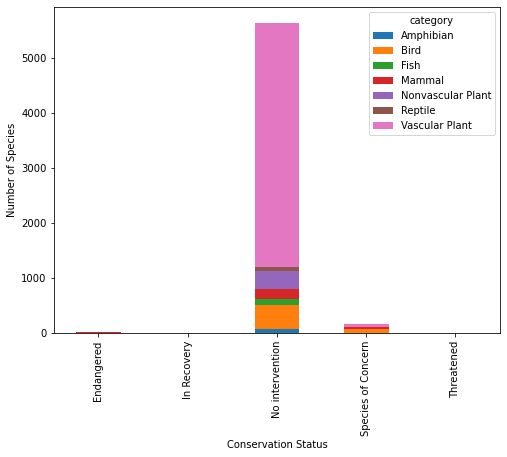

In [70]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

### Especies protegidas

In [118]:
data1['is_protected'] = data1.conservation_status != 'No intervention'
data1

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No intervention,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No intervention,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No intervention,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No intervention,False


In [135]:
data3 = data1.groupby(["category", "is_protected"]).scientific_name.nunique().reset_index().pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name').reset_index()


data3.columns = ["category", "not_protected", "protected"]
data3

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [137]:
data3["Percentage"] =data3.protected * 100/ (data3.not_protected + data3.protected)
data3

,category,not_protected,protected,Percentage
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


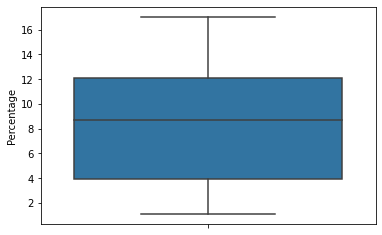

In [264]:
sns.boxplot(data=data3, y = "Percentage")
#sns.boxplot(data=data3, y = "not_protected")
plt.xticks(rotation = 90)
plt.show()

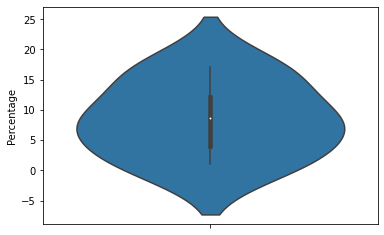

In [266]:
sns.violinplot(data = data3,y = "Percentage")
plt.show()

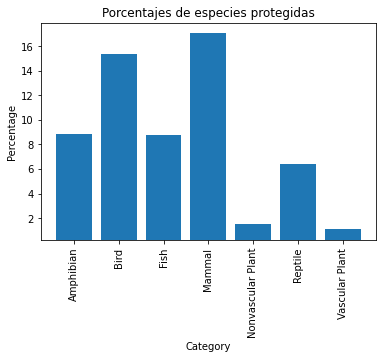

In [155]:
ax = plt.subplot()
plt.bar(data3.category,data3.Percentage)
plt.title("Porcentajes de especies protegidas")
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.xticks(rotation = 90)
plt.show()

In [171]:
from scipy.stats import chi2_contingency
import numpy as np

In [179]:
array1 = np.array([data3.iloc[3,1:3],
         data3.iloc[1,1:3]])
array1

chi2_contingency(array1)

(0.16170148316545574,
 0.6875948096661336,
 1,
 array([[148.1686747,  27.8313253],
        [410.8313253,  77.1686747]]))

The p-value is 0.69 much larger than 0.05 In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent.

In [180]:
array2 = np.array([data3.iloc[3,1:3],
         data3.iloc[5,1:3]])
array2

chi2_contingency(array2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[151.7480315,  24.2519685],
        [ 67.2519685,  10.7480315]]))

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles.

### Conservation status by specie

In [190]:
protection_counts = data1.groupby("conservation_status").scientific_name.nunique().reset_index().sort_values(by = "scientific_name")
protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No intervention,5363


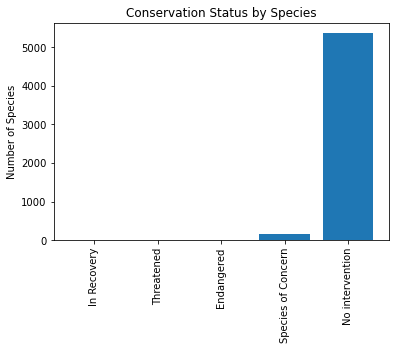

In [194]:
plt.bar(protection_counts.conservation_status, protection_counts.scientific_name)

plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.xticks(rotation = 90)
plt.show()

## Common name is sheep

In [218]:
data1['is_sheep'] = data1.common_names.apply(lambda x: 'Sheep' in x)
data1.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention,False,False


In [219]:
data1[data1.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [200]:
sheep_species = data1[(data1.is_sheep) & (data1.category == 'Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [201]:
sheep_observations = data2.merge(sheep_species)
sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No intervention,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No intervention,False,True


In [206]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


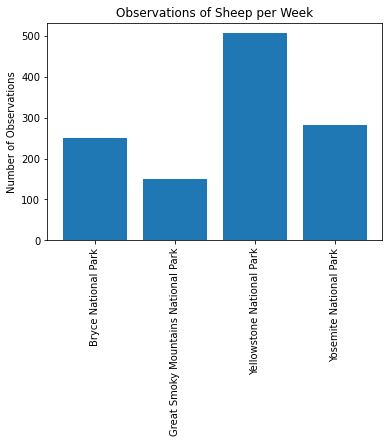

In [210]:
plt.bar(obs_by_park.park_name, obs_by_park.observations)
plt.xticks(rotation = 90)
plt.ylabel('Number of Observations')
plt.title('Observations of Sheep per Week')
plt.show()

## Common name is wolf

In [220]:
data1['is_wolf'] = data1.common_names.apply(lambda x: 'Wolf' in x)
data1.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,is_wolf
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No intervention,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",No intervention,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No intervention,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No intervention,False,True,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention,False,False,False


In [221]:
data1[data1.is_wolf]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,is_wolf
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True,False,True
3785,Vascular Plant,Symphoricarpos occidentalis,"Western Snowberry, Wolfberry",No intervention,False,False,True
3993,Vascular Plant,Euphorbia esula,"Leafy Spurge, Spurge, Wolf's Milk, Wolf's-Milk",No intervention,False,False,True
4020,Vascular Plant,Salix wolfii var. idahoensis,Wolf's Willow,No intervention,False,False,True
4288,Vascular Plant,Trisetum wolfii,"Wolf Trisetum, Wolf's Trisetum",No intervention,False,False,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True,False,True


In [225]:
wolf_species = data1[(data1.is_wolf) & (data1.category == "Mammal")]
wolf_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,is_wolf
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True,False,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True,False,True


In [226]:
wolf_observations = data2.merge(wolf_species)
wolf_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep,is_wolf
0,Canis rufus,Bryce National Park,30,Mammal,Red Wolf,Endangered,True,False,True
1,Canis rufus,Yosemite National Park,34,Mammal,Red Wolf,Endangered,True,False,True
2,Canis rufus,Great Smoky Mountains National Park,13,Mammal,Red Wolf,Endangered,True,False,True
3,Canis rufus,Yellowstone National Park,60,Mammal,Red Wolf,Endangered,True,False,True
4,Canis lupus,Yosemite National Park,35,Mammal,Gray Wolf,Endangered,True,False,True
5,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",In Recovery,True,False,True
6,Canis lupus,Yosemite National Park,35,Mammal,"Gray Wolf, Wolf",Endangered,True,False,True
7,Canis lupus,Bryce National Park,27,Mammal,Gray Wolf,Endangered,True,False,True
8,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",In Recovery,True,False,True
9,Canis lupus,Bryce National Park,27,Mammal,"Gray Wolf, Wolf",Endangered,True,False,True


In [227]:
obs_by_park1 = wolf_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park1

,park_name,observations
0,Bryce National Park,420
1,Great Smoky Mountains National Park,190
2,Yellowstone National Park,1050
3,Yosemite National Park,622


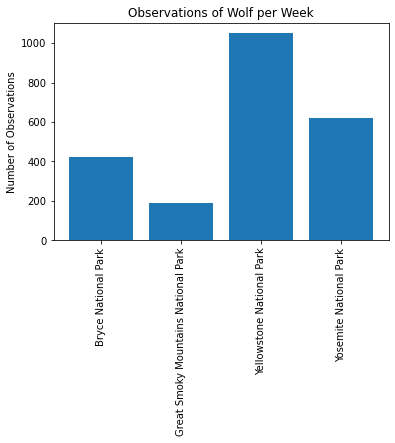

In [228]:
plt.bar(obs_by_park1.park_name, obs_by_park1.observations)
plt.xticks(rotation = 90)
plt.ylabel('Number of Observations')
plt.title('Observations of Wolf per Week')
plt.show()

### Relation between observations of sheep and wolf in every park

In [234]:
array4 = np.array([obs_by_park.observations,
        obs_by_park1.observations])
array4

array([[ 250,  149,  507,  282],
       [ 420,  190, 1050,  622]], dtype=int64)

In [235]:
chi2_contingency(array4)

(22.684336250269205,
 4.698691186727415e-05,
 3,
 array([[ 229.3832853 ,  116.0610951 ,  533.05936599,  309.4962536 ],
        [ 440.6167147 ,  222.9389049 , 1023.94063401,  594.5037464 ]]))

The p-value is 4.7E-05 much litter that 0.05, there is a relation between the wolf observations and sheep observations in every park

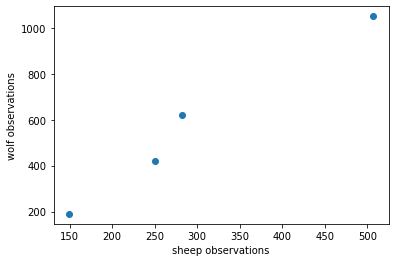

In [239]:
plt.scatter(array4[0], array4[1])
plt.xlabel("sheep observations")
plt.ylabel("wolf observations")
plt.show()

In [248]:
data4 = obs_by_park.merge(obs_by_park1,how = "inner", on = "park_name")
data4.columns = ["park_name", "sheep_obs", "wolf_obs"]
data4

,park_name,sheep_obs,wolf_obs
0,Bryce National Park,250,420
1,Great Smoky Mountains National Park,149,190
2,Yellowstone National Park,507,1050
3,Yosemite National Park,282,622


In [249]:
data4.corr()

,sheep_obs,wolf_obs
sheep_obs,1.000000,0.987035
wolf_obs,0.987035,1.000000


There is a higher correlation, then they are in relation